In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [120]:
feanum=6
window=5
df2=pd.read_excel('database_open.xlsx') 
df1=df2.iloc[:,1:]
df1.tail()

,Volume,High,Low,Close,Adj Close,Open
2411,11788500,576.809998,558.080017,566.900024,566.900024,568.489990
2412,17801500,589.799988,567.429993,580.989990,580.989990,575.690002
2413,29005700,650.880005,618.000000,640.809998,640.809998,632.419983
2414,15719300,653.000000,632.520020,650.570007,650.570007,640.000000
2415,47065000,786.140015,673.520020,780.000000,780.000000,673.690002


In [121]:
rate_origin=df1['Open']

In [122]:
df=(df1-df1.min())/(df1.max()-df1.min())
df.tail()

,Volume,High,Low,Close,Adj Close,Open
2411,0.248581,0.727970,0.824703,0.721146,0.721146,0.840012
2412,0.376663,0.744851,0.838901,0.739584,0.739584,0.850962
2413,0.615322,0.824226,0.915692,0.817862,0.817862,0.937237
2414,0.332310,0.826981,0.937741,0.830633,0.830633,0.948764
2415,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
def load_data(stock, seq_len):#输入data表格
    amount_of_features = len(stock.columns)#有几列
    data = stock.as_matrix() #pd.DataFrame(stock) 讲表格转化为矩阵
    sequence_length = seq_len + 1#序列长度5+1
    result = []
    for index in range(len(data) - sequence_length):#循环170-5次
        result.append(data[index: index + sequence_length])#第i行到i+5行

    result = np.array(result)#得到161个样本，样本形式为6天*3特征
    row = round(0.9 * result.shape[0])#划分训练集测试集
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]
#reshape成 5天*3特征
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]


In [124]:
X_train, y_train, X_test, y_test = load_data(df, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2169, 5, 6)
y_train (2169,)
X_test (241, 5, 6)
y_test (241,)


E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
d = 0.01
model = Sequential()
model.add(LSTM(16, input_shape=(window, feanum), return_sequences=True))
model.add(Dropout(d))
model.add(LSTM(8, input_shape=(window, feanum), return_sequences=False))
model.add(Dropout(d))
model.add(Dense(4,init='uniform',activation='relu'))        
model.add(Dense(1,init='uniform',activation='relu'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, nb_epoch = 50, batch_size = 16) #训练模型1000次

E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="uniform", activation="relu")`
  import sys
E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="relu")`
  
E:\anoconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
2169/2169 [==============================] - 3s 1ms/step - loss: 0.0370 - acc: 4.6104e-04
Epoch 2/100
2169/2169 [==============================] - 1s 411us/step - loss: 0.0011 - acc: 4.6104e-04
Epoch 3/100
2169/2169 [==============================] - 1s 414us/step - loss: 5.3456e-04 - acc: 4.6104e-04
Epoch 4/100
2169/2169 [==============================] - 1s 387us/step - loss: 4.2616e-04 - acc: 4.6104e-04
Epoch 5/100
2169/2169 [==============================] - 1s 411us/step - loss: 3.6735e-04 - acc: 4.6104e-04
Epoch 6/100
2169/2169 [==============================] - 1s 432us/step - loss: 3.9006e-04 - acc: 4.6104e-04
Epoch 7/100
2169/2169 [==============================] - 1s 410us/step - loss: 3.5337e-04 - acc: 4.6104e-04
Epoch 8/100
2169/2169 [==============================] - 1s 410us/step - loss: 3.8058e-04 - acc: 4.6104e-04
Epoch 9/100
2169/2169 [==============================] - 1s 415us/step - loss: 3.6970e-04 - acc: 4.6104e-04
Epoch 10/100
2169/2169 [==============

2169/2169 [==============================] - 1s 379us/step - loss: 1.1621e-04 - acc: 4.6104e-04 0s - loss: 1.4503e-04 - a
Epoch 76/100
2169/2169 [==============================] - 1s 392us/step - loss: 1.1014e-04 - acc: 4.6104e-04
Epoch 77/100
2169/2169 [==============================] - 1s 363us/step - loss: 1.1865e-04 - acc: 4.6104e-04
Epoch 78/100
2169/2169 [==============================] - 1s 356us/step - loss: 1.0658e-04 - acc: 4.6104e-04
Epoch 79/100
2169/2169 [==============================] - 1s 363us/step - loss: 1.1243e-04 - acc: 4.6104e-04
Epoch 80/100
2169/2169 [==============================] - 1s 351us/step - loss: 1.1638e-04 - acc: 4.6104e-04
Epoch 81/100
2169/2169 [==============================] - 1s 366us/step - loss: 1.1937e-04 - acc: 4.6104e-04
Epoch 82/100
2169/2169 [==============================] - 1s 369us/step - loss: 1.1412e-04 - acc: 4.6104e-04
Epoch 83/100
2169/2169 [==============================] - 1s 373us/step - loss: 1.0358e-04 - acc: 4.6104e-04
Epoch 

In [126]:
y_train_predict=model.predict(X_train)[:,0]
y_train=y_train#[:,0]

Text(0.5,1,'Train Data')

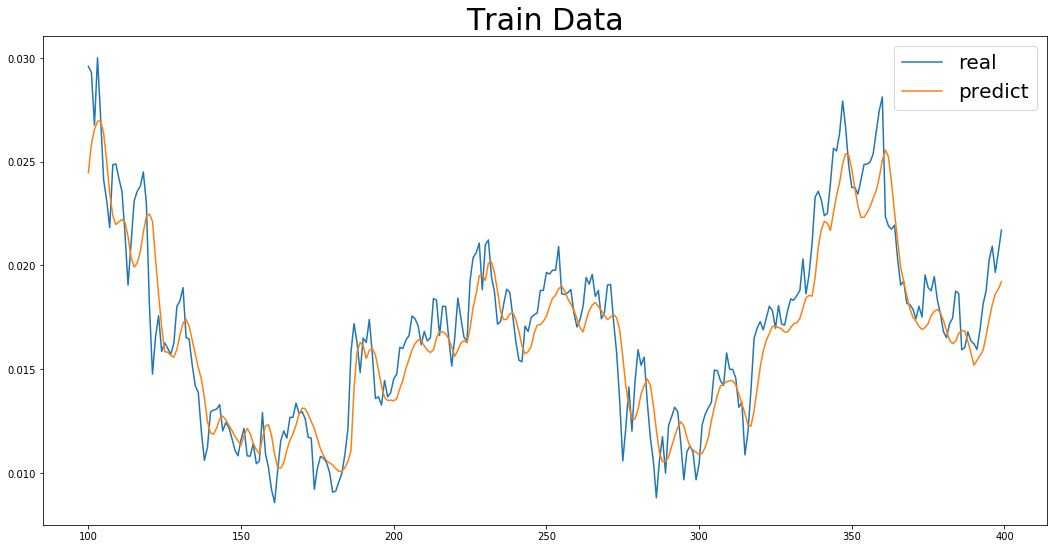

In [127]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(18,9))
draw.iloc[100:400,1].plot(figsize=(18,9))
plt.legend(('real', 'predict'),loc='upper right',fontsize='20')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [128]:
y_test_predict=model.predict(X_test)[:,0]
y_test=y_test

Text(0.5,1,'Test Data')

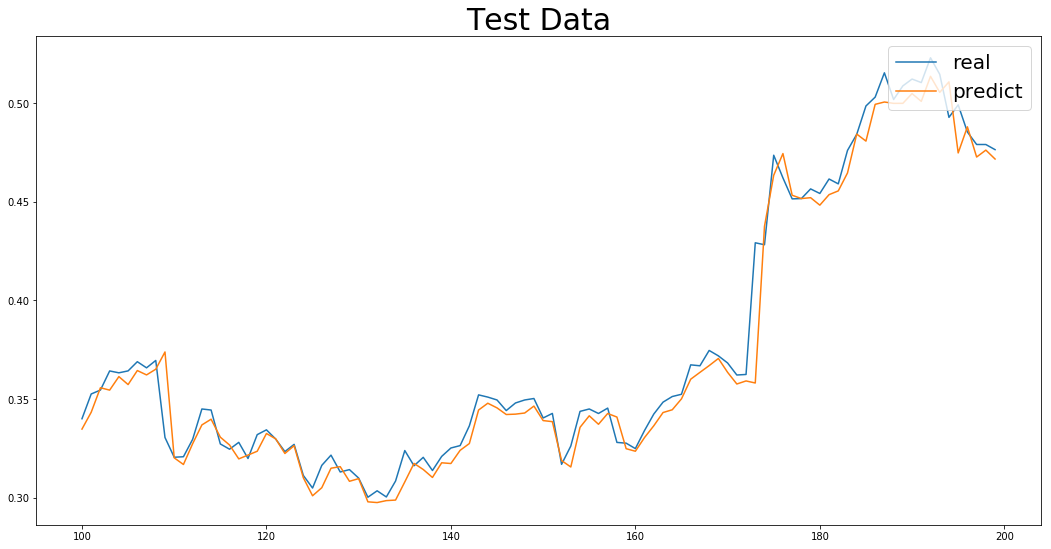

In [129]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:200,0].plot(figsize=(18,9))
draw.iloc[100:200,1].plot(figsize=(18,9))
plt.legend(('real', 'predict'),loc='upper right',fontsize='20')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [130]:
predata=model.predict(X_test)[:,0]
out=predata*(rate_origin.max()-rate_origin.min())+rate_origin.min()
df0 = pd.DataFrame(out)
print('已经保存预测数据在文件predict_value.csv中')
df00=pd.concat([df2.iloc[-len(out):,0:1], df0], axis=1)
df00.to_csv('predict_open_lstm.csv')

已经保存预测数据在文件predict_value.csv中


In [131]:
last_test=X_test[-1:,:,:]

In [132]:
last=model.predict(last_test)[:,0]

In [133]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('训练集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_train), y_train))
print(mean_squared_error(model.predict(X_train), y_train) )
print('测试集上的MAE和MSE')
print(mean_absolute_error(model.predict(X_test), y_test))
print(mean_squared_error(model.predict(X_test), y_test) )
print('最后一天预测结果')
print(last*(rate_origin.max()-rate_origin.min())+rate_origin.min())

训练集上的MAE和MSE
0.004634443568944175
4.7450151572168074e-05
测试集上的MAE和MSE
0.011412734397965718
0.0005233457143433412
最后一天预测结果
[563.93225]
